In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, StandardScaler

In [2]:
X = pd.read_csv('cereal_activity.csv')
X.head()

,ID,name,calories,carbo,sugars
0,0,100% Bran,70,5.0,6
1,1,100% Natural Bran,120,8.0,8
2,2,All-Bran,70,7.0,5
3,3,All-Bran with Extra Fiber,50,8.0,0
4,4,Almond Delight,110,14.0,8


In [3]:
drop_features = ['ID','name']
X = X.drop(drop_features, axis = 1)

In [4]:
X.ffill(inplace=True)
X.head()

,calories,carbo,sugars
0,70,5.0,6
1,120,8.0,8
2,70,7.0,5
3,50,8.0,0
4,110,14.0,8


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_normalized = normalize(X_scaled)


X_normalized = pd.DataFrame(X_normalized)


X_normalized.columns = X.columns

X_normalized.head()

,calories,carbo,sugars
0,-0.643368,-0.762304,-0.070505
1,0.396057,-0.907074,0.142671
2,-0.719455,-0.674814,-0.164349
3,-0.799756,-0.422367,-0.426610
4,0.496303,-0.433148,0.752374


In [7]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)


optics_model.fit(X_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

## Comparing the performance of OPTICS and DBSCAN

### to validate DBSCAN lacks clustering in different densities

In [8]:
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)

In [9]:
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 2)

In [10]:
space = np.arange(len(X_normalized))

In [11]:
reachability = optics_model.reachability_[optics_model.ordering_]

In [12]:
labels = optics_model.labels_[optics_model.ordering_]

In [13]:
print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


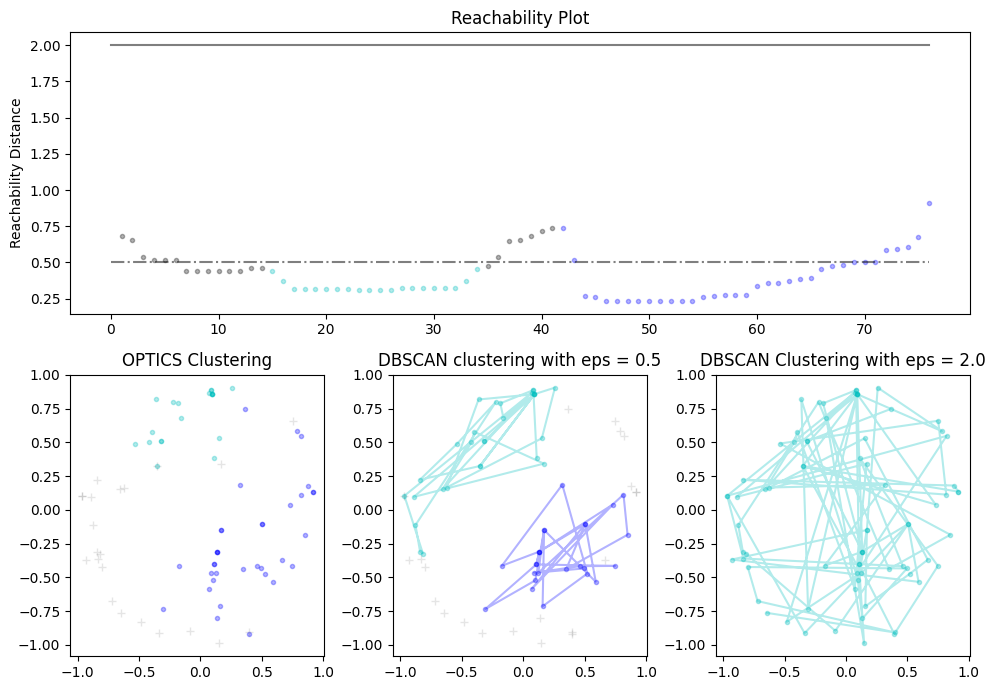

In [14]:

plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = X_normalized[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
	
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
		X_normalized.iloc[optics_model.labels_ == -1, 1],
	'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')


colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = X_normalized[labels1 == Class]
	ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
	
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
		X_normalized.iloc[labels1 == -1, 1],
	'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')


colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = X_normalized.iloc[labels2 == Class]
	ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
		
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
		X_normalized.iloc[labels2 == -1, 1],
	'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()